# Google playstore Data
### complete EDA analysis for Begnners to Advance EDA

## About Dataset
>- **`Description`**/ 
> The Data Set was Dowloaded from Kaggle from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data)
- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Data Loading and exploration | Cleaning

 - Let's load the csv file

In [4]:
df = pd.read_csv('./data/googleplaystore.csv')

- Let's have a look on top 5 rows of te data

In [5]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# set option to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
print(f"The names of columns in this dataset are as follows: {df.columns}")

The names of columns in this dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [8]:
print(f"The number of rows are: {df.shape[0]}, and columns are {df.shape[1]}")

The number of rows are: 10841, and columns are 13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# how to make size a numeric column?

In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
## observation
1. "varies with device"
2. M
3. K

In [13]:
df['Size'].isnull().sum()

np.int64(0)

- No missing value in size, we are good to go

Verify the number value and 3 different kinds of value

In [14]:
# find the value having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

In [15]:
# find the value having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [16]:
# find the value having varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [17]:
len(df)

10841

In [18]:
8830+316+1695

10841

In [19]:
# convert the whole size the column into bytes
#let's define a function
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', "")) * 1024
        elif 'M' in size:
            return float(size.replace('M', "")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size


In [20]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [21]:
# let's apply this function 
df['Size'] = df['Size'].apply(convert_size)

In [22]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [23]:
# rename the column
df.rename(columns={'Size':'Size_in_Bytes'}, inplace=True)

In [24]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df['size_in_Mb'] = pd.to_numeric(df['size_in_bytes'], errors='coerce')


KeyError: 'size_in_bytes'

In [26]:
df['size_in_kb'] = pd.to_numeric(df['size_in_bytes'], errors='coerce')

KeyError: 'size_in_bytes'

In [27]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


let's take care of install

In [28]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [29]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [30]:
df['Installs'].isnull().sum()

np.int64(0)

Install Column:
1. Remove + sign
2. remove ,
3. Convert the column into integer

In [31]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)

In [32]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)

In [33]:
df['Installs'] = df['Installs'].apply(lambda x: int())

In [34]:
df['Installs'].value_counts()

Installs
0    10841
Name: count, dtype: int64

In [35]:
df.describe()

,Rating,Installs
count,9367.000000,10841.0
mean,4.193338,0.0
std,0.537431,0.0
min,1.000000,0.0
25%,4.000000,0.0
50%,4.300000,0.0
75%,4.500000,0.0
max,19.000000,0.0


# Price Column

In [36]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$3.49           7
$29.99          7
$7.99           7
$24.99          7
$5.49           6
$19.99          6
$12.99          5
$6.49           5
$8.99           5
$11.99          5
$2.00           3
$10.00          3
$16.99          3
$1.00           3
$7.49           2
$17.99          2
$8.49           2
$10.99          2
$79.99          2
$9.00           2
$39.99          2
$1.70           2
$3.95           2
$13.99          2
$33.99          2
$15.99          1
$1.50           1
$400.00         1
$74.99          1
$25.99          1
$3.88           1
$4.84           1
$1.76           1
$3.02           1
$4.77           1
$1.59           1
$2.50           1
$1.29           1
$1.61           1
$5.00           1
$299.99         1
$37.

In [37]:
# let's see how many values $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [38]:
# This code counts the number of value in the 'Price' column which contains 0 but does not contain the $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10040)

In [39]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [40]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
3.49            7
29.99           7
7.99            7
24.99           7
5.49            6
19.99           6
12.99           5
6.49            5
8.99            5
11.99           5
2.00            3
10.00           3
16.99           3
1.00            3
7.49            2
17.99           2
8.49            2
10.99           2
79.99           2
9.00            2
39.99           2
1.70            2
3.95            2
13.99           2
33.99           2
15.99           1
1.50            1
400.00          1
74.99           1
25.99           1
3.88            1
4.84            1
1.76            1
3.02            1
4.77            1
1.59            1
2.50            1
1.29            1
1.61            1
5.00            1
299.99          1
37.9

In [41]:
# now we can convert this into a numeric value
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [42]:
df['Price'] = df['Price'].apply(lambda x: float(x))

In [43]:
df.describe()

,Rating,Installs,Price
count,9367.000000,10841.0,10840.000000
mean,4.193338,0.0,1.027368
std,0.537431,0.0,15.949703
min,1.000000,0.0,0.000000
25%,4.000000,0.0,0.000000
50%,4.300000,0.0,0.000000
75%,4.500000,0.0,0.000000
max,19.000000,0.0,400.000000


In [44]:
# using f string print min, max and average price of the apps
print(f"min price is {df['Price'].min()}")
print(f"max price is {df['Price'].max()}")
print(f"average price is {df['Price'].mean()}")

min price is 0.0
max price is 400.0
average price is 1.027368081180812


Missing Values

In [45]:
# find missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_in_Bytes     1695
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [46]:
# find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

Size_in_Bytes     15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.03
Type               0.01
Content Rating     0.01
Price              0.01
App                0.00
Category           0.00
Reviews            0.00
Installs           0.00
Last Updated       0.00
Genres             0.00
dtype: float64

In [47]:
# find total number of missing values 
df.isnull().sum().sum()

np.int64(3183)

<Axes: >

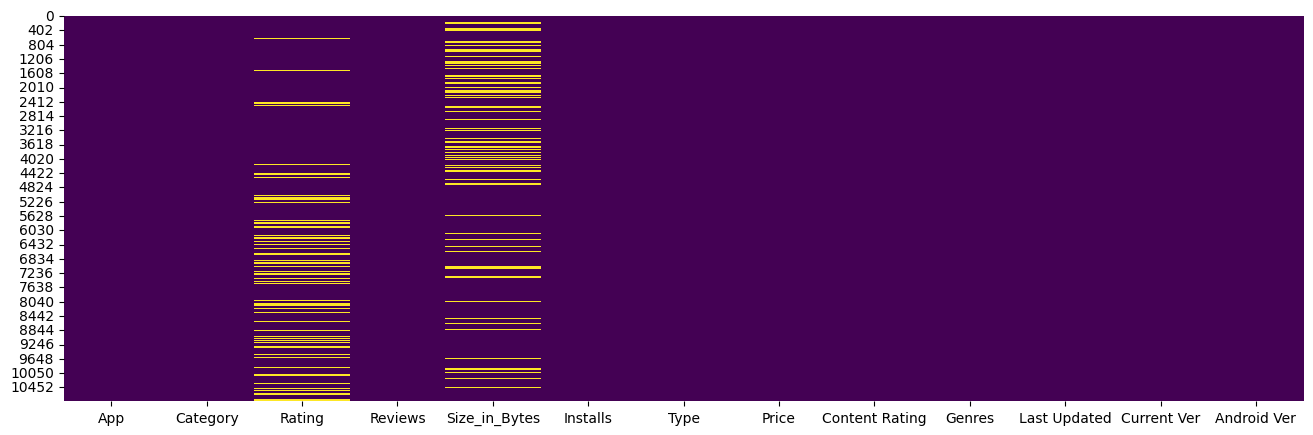

In [48]:
# plot missing values
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in Each Column')

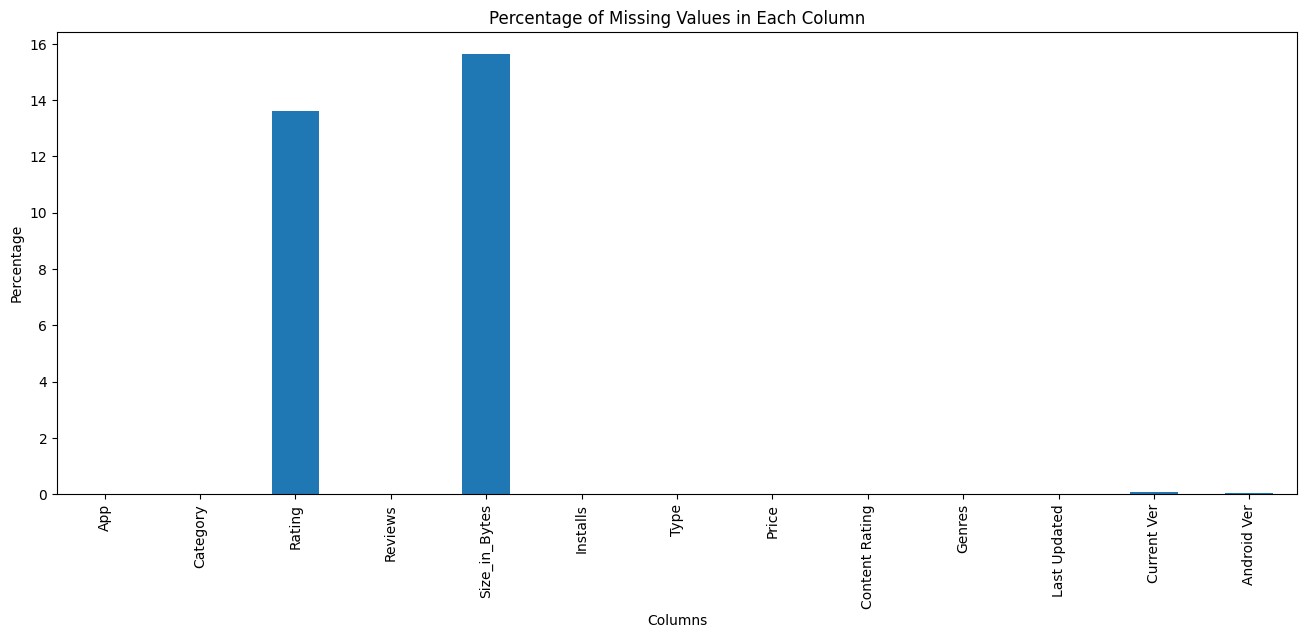

In [49]:
# make figure size
plt.figure(figsize=(16,6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/ len(df)* 100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in Each Column')

<Axes: >

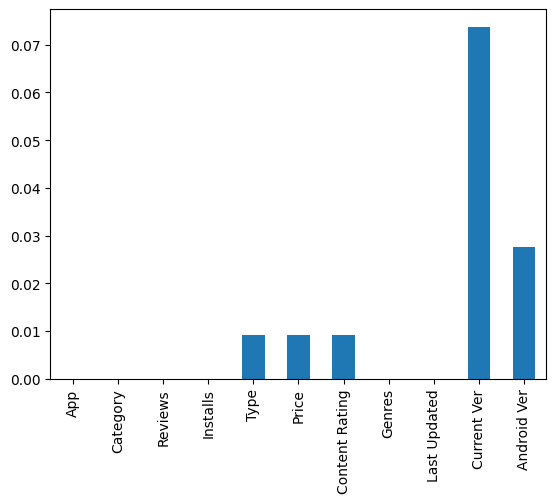

In [50]:
missing_percentage[missing_percentage < 1].plot(kind='bar')